## Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

In [1]:
# !pip install --upgrade tensorflow

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
print(f"Tensorflow version is: {tf.__version__}")
print(f"Keras version is: {keras.__version__}")

Tensorflow version is: 2.17.0
Keras version is: 3.4.1


## Q2. Load the Wine Quality dataset and explore its dimensions.

#### Dataset link - https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification

In [4]:
import pandas as pd

wine_df = pd.read_csv(filepath_or_buffer="/content/data/wine.csv")
wine_df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


##### Information about the dataset

This Data set contains the information related red wine , Various factors affecting the quality. This data set was prepossessed and downloaded from the UCI Machine Learning Repository. This data set was simple, cleaned, practice data set for classification modelling.

**Input variables (based on physicochemical tests):**

1. fixed acidity  
2. volatile acidity  
3. citric acid  
4. residual sugar  
5. chlorides  
6. free sulfur dioxide  
7. total sulfur dioxide  
8. density  
9. pH  
10. sulphates  
11. alcohol  

**Output variable (based on sensory data):**

12. quality ('good' and 'bad' based on score >5 and <5)

In [5]:
print(f"The shape of the dataset is: {wine_df.shape}")

The shape of the dataset is: (1599, 12)


## Q3. Check for null values, identify categorical variables, and encode them.

In [6]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [7]:
wine_df.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


##### So, there are no null values in the dataset

In [8]:
categorical_cols = wine_df.select_dtypes(include=["object", "category"]).columns
numerical_cols = wine_df.select_dtypes(exclude=["object", "category"]).columns

print(f"The categorical columns are: {categorical_cols}")
print(f"The numerical columns are: {numerical_cols}")

The categorical columns are: Index(['quality'], dtype='object')
The numerical columns are: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


##### Let's encode the only categorical column "Quality" in the dataset

In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
wine_df["quality"] = label_encoder.fit_transform(wine_df["quality"])
wine_df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [10]:
wine_df["quality"].value_counts()

,count
quality,
1,855
0,744


##### Here, 0 represents "bad" and 1 represents "good" quality respectively.

## Q4. Separate the features and target variables from the dataframe.

In [11]:
features = wine_df.drop(columns=["quality"], axis=1)
target = wine_df["quality"]

## Q5. Perform a train-test split and divide the data into training, validation, and test datasets.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print(f"The training dataset size: {X_train.shape, y_train.shape}")
print(f"The testing dataset size: {X_test.shape, y_test.shape}")

The training dataset size: ((1279, 11), (1279,))
The testing dataset size: ((320, 11), (320,))


## Q6. Perform scaling on the dataset.

In [13]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1279.0,8.323690,1.724243,4.60000,7.100000,7.9000,9.200000,15.90000
volatile acidity,1279.0,0.530559,0.179275,0.12000,0.400000,0.5200,0.640000,1.58000
citric acid,1279.0,0.272471,0.195448,0.00000,0.100000,0.2600,0.430000,1.00000
residual sugar,1279.0,2.555473,1.435790,0.90000,1.900000,2.2000,2.600000,15.50000
chlorides,1279.0,0.088448,0.049332,0.01200,0.071000,0.0800,0.091000,0.61100
free sulfur dioxide,1279.0,15.876075,10.313517,1.00000,7.000000,14.0000,21.000000,68.00000
total sulfur dioxide,1279.0,46.657154,32.941962,6.00000,22.000000,38.0000,63.000000,289.00000
density,1279.0,0.996774,0.001856,0.99007,0.995655,0.9968,0.997845,1.00369
pH,1279.0,3.311650,0.154016,2.74000,3.210000,3.3100,3.400000,4.01000
sulphates,1279.0,0.660023,0.174605,0.37000,0.550000,0.6200,0.730000,2.00000


In [14]:
X_train.head(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
493,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9
342,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns = X_train.columns
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=columns)
X_train.head(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.218332,0.889712,0.192092,0.309726,-0.049642,0.691007,1.042934,1.846696,1.093500,0.458223,1.123177
1,-1.290166,-1.788783,0.652753,-0.805080,-0.455214,2.388473,3.593870,-3.004491,-0.400439,-0.401197,1.408272
2,1.494753,-0.784347,1.011045,-0.526378,0.599272,-0.957960,-0.991742,0.768655,-0.075669,0.515517,-0.587390
3,0.276351,0.861811,-0.063831,-0.665729,-0.009085,0.012020,-0.718427,0.089488,0.054238,-1.088733,-0.967516


## Q7. Create at least 2 hidden layers and an output layer for the binary categorical variables.

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models

layer1 = layers.Dense(units=256, activation='relu', input_shape=(X_train.shape[1],))
layer2 = layers.BatchNormalization()
# layer3 = layers.Dropout(rate=0.2)

layer4 = layers.Dense(units=128, activation='relu')
layer5 = layers.BatchNormalization()
# layer6 = layers.Dropout(rate=0.2)

output = layers.Dense(1, activation='sigmoid')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Q8. Create a Sequential model and add all the layers to it.

In [18]:
model = models.Sequential()
model.add(layer1)
model.add(layer2)
# model.add(layer3)
model.add(layer4)
model.add(layer5)
# model.add(layer6)
model.add(output)

##### Summary of the Neural Network Model

In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,633 (147.00 KB)

 Trainable params: 36,865 (144.00 KB)

 Non-trainable params: 768 (3.00 KB)

## Q9. Implement a TensorBoard callback to visualize and monitor the model's training process.

In [20]:
# !pip install tensorboard

In [21]:
from tensorflow.keras.callbacks import TensorBoard
import time

log_dir = "./logs/fit/" + time.strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

## Q10. Use Early Stopping to prevent overfitting by monitoring a chosen metric and stopping the training if no improvement is observed.

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor="val_loss", patience=10)

## Q11. Implement a ModelCheckpoint callback to save the best model based on a chosen metric during training.

In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_path = "/content/models/best_model.h5.keras"
model_checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', save_best_only=True, mode='min', verbose=1)

## Q12. Print the model summary.

In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,633 (147.00 KB)

 Trainable params: 36,865 (144.00 KB)

 Non-trainable params: 768 (3.00 KB)

## Q13. Use binary cross-entropy as the loss function, Adam optimizer, and include the metric ['accuracy'].

In [25]:
from keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0001)
loss = 'binary_crossentropy'
metrics = ['accuracy']

## Q14. Compile the model with the specified loss function, optimizer, and metrics.

In [26]:
model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=metrics
)

## Q15. Fit the model to the data, incorporating the TensorBoard, Early Stopping, and ModelCheckpoint callbacks.

In [27]:
hist = model.fit(
    X_train,
    y_train,
    epochs=500,
    validation_split=0.2,
    batch_size=32,
    callbacks=[early_stopping, model_checkpoint, tensorboard_callback]
)

Epoch 1/500
23/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4711 - loss: 0.8876
Epoch 1: val_loss improved from inf to 0.64559, saving model to /content/models/best_model.h5.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.4900 - loss: 0.8575 - val_accuracy: 0.6992 - val_loss: 0.6456
Epoch 2/500
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6656 - loss: 0.6332
Epoch 2: val_loss improved from 0.64559 to 0.63236, saving model to /content/models/best_model.h5.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6686 - loss: 0.6305 - val_accuracy: 0.6797 - val_loss: 0.6324
Epoch 3/500
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7414 - loss: 0.5457
Epoch 3: val_loss did not improve from 0.63236
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7386 - loss: 0.5465 - val_accuracy: 0.6445 - val_loss: 0.6328
Epoch 4/500
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7328 - loss: 0.5516
Epoch 4: val_loss improved from 0.63236 to 0.62325, saving mo

## Q16. Get the model's parameters.

In [28]:
model.get_build_config()

{'input_shape': (None, 11)}

In [29]:
model.get_config()

{'name': 'sequential_1',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 11),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer_1'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regul

## Q17. Store the model's training history as a Pandas DataFrame.

In [30]:
history_df = pd.DataFrame(hist.history)

# Display the DataFrame
print(history_df)

    accuracy      loss  val_accuracy  val_loss
0   0.548387  0.770531      0.699219  0.645590
1   0.688172  0.613494      0.679688  0.632356
2   0.723363  0.551983      0.644531  0.632807
3   0.749756  0.545721      0.640625  0.623253
4   0.733138  0.526941      0.640625  0.615258
5   0.753666  0.506055      0.664062  0.601816
6   0.751711  0.497780      0.679688  0.582908
7   0.775171  0.495913      0.699219  0.559072
8   0.767351  0.486339      0.742188  0.539774
9   0.762463  0.480868      0.765625  0.514820
10  0.774194  0.460444      0.765625  0.506021
11  0.768328  0.473539      0.785156  0.486454
12  0.780059  0.465613      0.789062  0.476385
13  0.798631  0.444079      0.785156  0.475055
14  0.786901  0.448456      0.796875  0.467819
15  0.801564  0.441261      0.792969  0.462053
16  0.800587  0.436893      0.789062  0.456134
17  0.793744  0.427326      0.796875  0.455102
18  0.798631  0.428232      0.792969  0.455116
19  0.801564  0.420991      0.792969  0.455480
20  0.810362 

In [31]:
history_df.to_csv("/content/models/history.csv", index=False)

## Q18. Plot the model's training history.

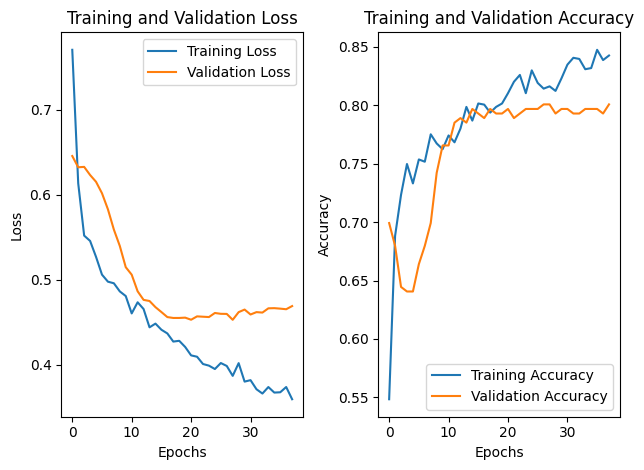

In [32]:
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Q19. Evaluate the model's performance using the test data

In [33]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

# Print the results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8032 - loss: 0.4577 
Test Loss: 0.4830
Test Accuracy: 0.7781


In [34]:
# Predicting test data
ts_prob = model.predict(X_test)
ts_prob[0:5]

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


array([[0.3999125 ],
       [0.22465041],
       [0.76129955],
       [0.322278  ],
       [0.8397391 ]], dtype=float32)

In [35]:
# Predict with threshold value of 0.5
thr = 0.5
ypred_ts = []
for i in ts_prob:
    if i>=0.5:
        ypred_ts.append(1)
    else:
        ypred_ts.append(0)

In [39]:
ypred_ts[0:5]

[0, 0, 1, 0, 1]

In [37]:
y_test.head()

,quality
803,1
124,0
350,1
682,0
1326,1
